In [1]:
# import configurations saved from the EDA project
from configurations_features import *

Selected feature names: ['node_caps_yes', 'breast_quad_right_up', 'irrad_yes', 'inv_nodes', 'tumour_size', 'deg_malig']
Feature importances: [0.11591403 0.07054459 0.07221952 0.25213264 0.26568745 0.22350178]


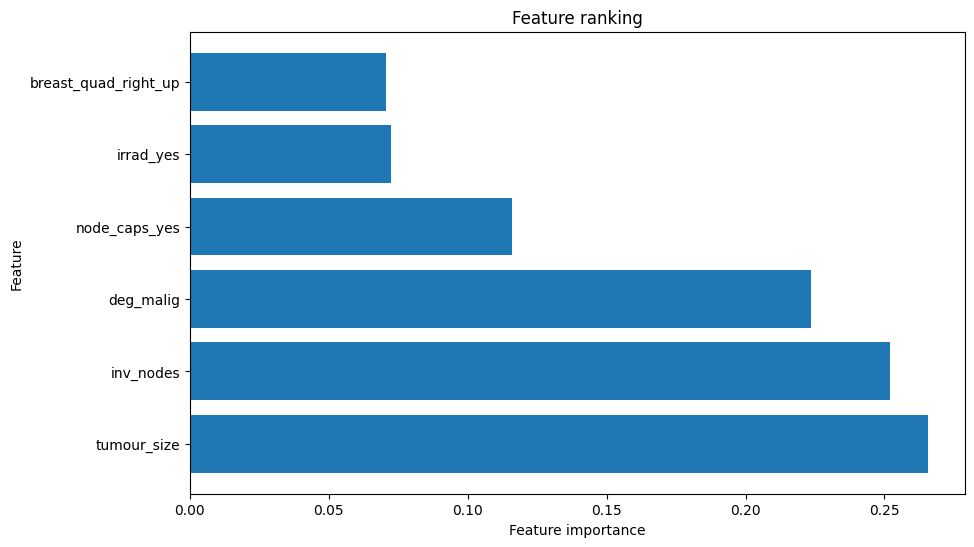

In [2]:
categorical_features = [col for col in X_train_encoded.columns if col != 'deg_malig']
skb_cat = SelectKBest(f_classif, k=5)
X_selected_cat = skb_cat.fit_transform(X_train_encoded[categorical_features], y_train_encoded)
selected_cat_feature_names = X_train_encoded[categorical_features].columns[skb_cat.get_support()].tolist()

skb_num = SelectKBest(f_regression, k=1)
X_selected_num = skb_num.fit_transform(X_train_encoded[['deg_malig']], y_train_encoded) 
selected_num_feature_names = X_train_encoded[['deg_malig']].columns[skb_num.get_support()].tolist()

# Fit a RandomForestClassifier with the selected features and best hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

best_rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(best_rfc, param_grid, cv=5, scoring='f1_micro')
grid_search.fit(X_train_encoded[selected_cat_feature_names + selected_num_feature_names], y_train_encoded)
best_rfc = grid_search.best_estimator_
importances = best_rfc.feature_importances_

# Print the selected feature names and their importances
selected_feature_names = selected_cat_feature_names + selected_num_feature_names
print('Selected feature names:', selected_feature_names)
print('Feature importances:', importances)

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Create a horizontal bar chart of the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_feature_names)), importances[indices], align='center')
plt.yticks(range(len(selected_feature_names)), [selected_feature_names[i] for i in indices])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature ranking')
plt.show()


In [3]:
feature_names = X_train_encoded.columns

cv = StratifiedKFold(n_splits=5)

# Create a logistic regression estimator
lr = LogisticRegression(max_iter=10000, random_state=42)

# Perform recursive feature elimination with cross-validation using logistic regression
rfecv_lr = RFECV(estimator=lr, step=1, cv=cv, scoring='f1_micro')
rfecv_lr.fit(X_train_encoded, y_train_encoded)

# Print the optimal number of features and their names
print("Logistic Regression")
print("Optimal number of features: %d" % rfecv_lr.n_features_)
selected_feature_names = feature_names[rfecv_lr.get_support()].tolist()
print("Selected feature names:", selected_feature_names, '\n')

# Create a decision tree classifier estimator
dtc = DecisionTreeClassifier(random_state=42)

# Perform recursive feature elimination with cross-validation using decision tree classifier
rfecv_dtc = RFECV(estimator=dtc, step=1, cv=cv, scoring='f1_micro')
rfecv_dtc.fit(X_train_encoded, y_train_encoded)

# Print the optimal number of features and their names
print("Decision Tree Classifier")
print("Optimal number of features: %d" % rfecv_dtc.n_features_)
selected_feature_names = feature_names[rfecv_dtc.get_support()].tolist()
print("Selected feature names:", selected_feature_names, '\n')

# Create a random forest classifier estimator
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Perform recursive feature elimination with cross-validation using random forest classifier
rfecv_rfc = RFECV(estimator=rfc, step=1, cv=cv, scoring='f1_micro')
rfecv_rfc.fit(X_train_encoded, y_train_encoded)

# Print the optimal number of features and their names
print("Random Forest Classifier")
print("Optimal number of features: %d" % rfecv_rfc.n_features_)
selected_feature_names = feature_names[rfecv_rfc.get_support()].tolist()
print("Selected feature names:", selected_feature_names, '\n')

Logistic Regression
Optimal number of features: 7
Selected feature names: ['node_caps_yes', 'breast_quad_left_low', 'breast_quad_left_up', 'breast_quad_right_up', 'irrad_yes', 'inv_nodes', 'deg_malig'] 

Decision Tree Classifier
Optimal number of features: 8
Selected feature names: ['node_caps_yes', 'breast_quad_left_low', 'breast_quad_left_up', 'breast_quad_right_up', 'irrad_yes', 'inv_nodes', 'tumour_size', 'deg_malig'] 

Random Forest Classifier
Optimal number of features: 9
Selected feature names: ['node_caps_yes', 'breast_quad_left_low', 'breast_quad_left_up', 'breast_quad_right_low', 'breast_quad_right_up', 'irrad_yes', 'inv_nodes', 'tumour_size', 'deg_malig'] 

